In [ ]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Afficher toutes les colonnes et lignes du DataFrame

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("moroccan_exports_trademap.csv")

In [ ]:
df.head(10)

,Code,Product label,Exported value in 2003,Exported value in 2004,Exported value in 2005,Exported value in 2006,Exported value in 2007,Exported value in 2008,Exported value in 2009,Exported value in 2010,Exported value in 2011,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019,Exported value in 2020,Exported value in 2021,Exported value in 2022
0,TOTAL,All products,8738341,9870179,11197413,12731303,15321255,20094617,14027369,17764791,21649934,21417184,21967951,23815816,22197567,22850021,25619900,29317739,29592492,27704922,36578743,42331463
1,31,Fertilisers,371608,431325,444344,533674,876747,1412452,697642,1561945,2317995,2416815,1924549,2060879,1872511,2133011,2580227,3168304,2914949,3385504,5714861,7715003
2,87,Vehicles other than railway or tramway rolling...,46680,55256,76111,117890,161777,201129,223629,245346,426212,990919,1642522,2456599,2644755,3137905,3394836,3875243,3830883,3614653,5041423,6370692
3,85,Electrical machinery and equipment and parts t...,1176179,1257912,1599657,1930282,2359746,2504401,1998575,2632491,3172824,2834799,3170166,3781969,3509440,3739194,4228090,4925873,5300422,4658452,5249193,5995016
4,62,"Articles of apparel and clothing accessories, ...",1952757,2116194,2040800,2377490,2532616,2483422,2236326,2142622,2280072,2256837,2261995,2401451,2060468,2238045,2401926,2533095,2424111,1911834,2518580,2726952
5,28,Inorganic chemicals; organic or inorganic comp...,519657,732954,872760,925701,1153346,2968195,1018911,1663483,2147924,1676182,1448252,1543440,1678750,1162832,1137272,1503493,1433545,1217961,2236280,2385771
6,08,Edible fruit and nuts; peel of citrus fruit or...,320419,348239,468674,457921,564416,644917,514805,575178,743440,601504,690664,696443,744154,742006,927867,1173523,1359731,1516152,1763942,1880422
7,07,Edible vegetables and certain roots and tubers,256405,281496,309620,335756,558603,549613,591561,601252,741087,672198,817424,864981,907412,902229,1129774,1269495,1395338,1317416,1483688,1677661
8,25,Salt; sulphur; earths and stone; plastering ma...,416798,489720,585334,662021,828411,2377330,636967,1173944,1699374,1739410,1345705,1220714,1313633,948077,1080104,1121186,1003759,929765,1245099,1617100
9,03,"Fish and crustaceans, molluscs and other aquat...",616517,452741,632377,710652,876719,986469,802853,768141,893278,907527,978372,1016759,1062751,1222485,1312343,1361733,1214233,1251356,1759859,1592459


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code                    98 non-null     object
 1   Product label           98 non-null     object
 2   Exported value in 2003  98 non-null     int64 
 3   Exported value in 2004  98 non-null     int64 
 4   Exported value in 2005  98 non-null     int64 
 5   Exported value in 2006  98 non-null     int64 
 6   Exported value in 2007  98 non-null     int64 
 7   Exported value in 2008  98 non-null     int64 
 8   Exported value in 2009  98 non-null     int64 
 9   Exported value in 2010  98 non-null     int64 
 10  Exported value in 2011  98 non-null     int64 
 11  Exported value in 2012  98 non-null     int64 
 12  Exported value in 2013  98 non-null     int64 
 13  Exported value in 2014  98 non-null     int64 
 14  Exported value in 2015  98 non-null     int64 
 15  Exported

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Filtrer les lignes pour inclure uniquement celles avec le produit 'fish'
df_fish = df[df['Product label'] == 'Fish and crustaceans, molluscs and other aquatic invertebrates']

# Utiliser melt pour transformer les années et les vale urs d'exportation en colonnes
df_melted = df_fish.melt(id_vars=['Code', 'Product label'],
                         var_name='Year',
                         value_name='Exported Value')

# Nettoyer la colonne 'Year' pour extraire uniquement l'année
df_melted['Year'] = df_melted['Year'].str.extract('(\d{4})').astype(int)

# Normaliser les données
scaler = MinMaxScaler()
df_melted['Exported Value'] = scaler.fit_transform(df_melted[['Exported Value']])

# Créer les colonnes finales
df_final = df_melted[['Product label', 'Year', 'Exported Value']]

# Afficher le dataframe transformé
print("Transformed DataFrame:\n", df_final)

Transformed DataFrame:
                                         Product label  Year  Exported Value
0   Fish and crustaceans, molluscs and other aquat...  2003        0.125295
1   Fish and crustaceans, molluscs and other aquat...  2004        0.000000
2   Fish and crustaceans, molluscs and other aquat...  2005        0.137429
3   Fish and crustaceans, molluscs and other aquat...  2006        0.197313
4   Fish and crustaceans, molluscs and other aquat...  2007        0.324361
5   Fish and crustaceans, molluscs and other aquat...  2008        0.408324
6   Fish and crustaceans, molluscs and other aquat...  2009        0.267850
7   Fish and crustaceans, molluscs and other aquat...  2010        0.241294
8   Fish and crustaceans, molluscs and other aquat...  2011        0.337029
9   Fish and crustaceans, molluscs and other aquat...  2012        0.347930
10  Fish and crustaceans, molluscs and other aquat...  2013        0.402130
11  Fish and crustaceans, molluscs and other aquat...  2014     

In [ ]:
df_final.head()

,Product label,Year,Exported Value
0,"Fish and crustaceans, molluscs and other aquat...",2003,0.125295
1,"Fish and crustaceans, molluscs and other aquat...",2004,0.000000
2,"Fish and crustaceans, molluscs and other aquat...",2005,0.137429
3,"Fish and crustaceans, molluscs and other aquat...",2006,0.197313
4,"Fish and crustaceans, molluscs and other aquat...",2007,0.324361


In [ ]:
df_final.set_index('Year', inplace=True)

In [ ]:
df_final.head()

,Product label,Exported Value
Year,,
2003,"Fish and crustaceans, molluscs and other aquat...",0.125295
2004,"Fish and crustaceans, molluscs and other aquat...",0.000000
2005,"Fish and crustaceans, molluscs and other aquat...",0.137429
2006,"Fish and crustaceans, molluscs and other aquat...",0.197313
2007,"Fish and crustaceans, molluscs and other aquat...",0.324361


<Axes: xlabel='Year'>

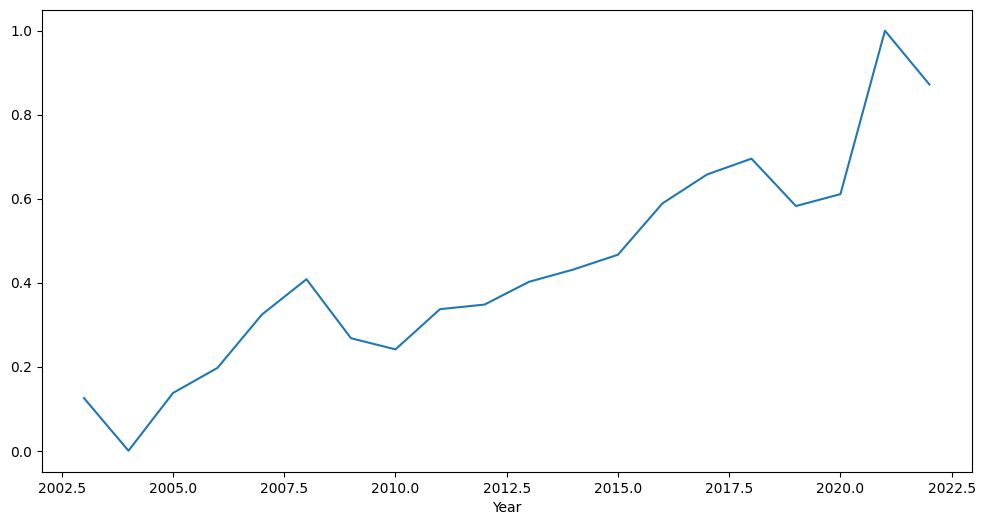

In [ ]:
df_final['Exported Value'].plot(figsize=(12,6))

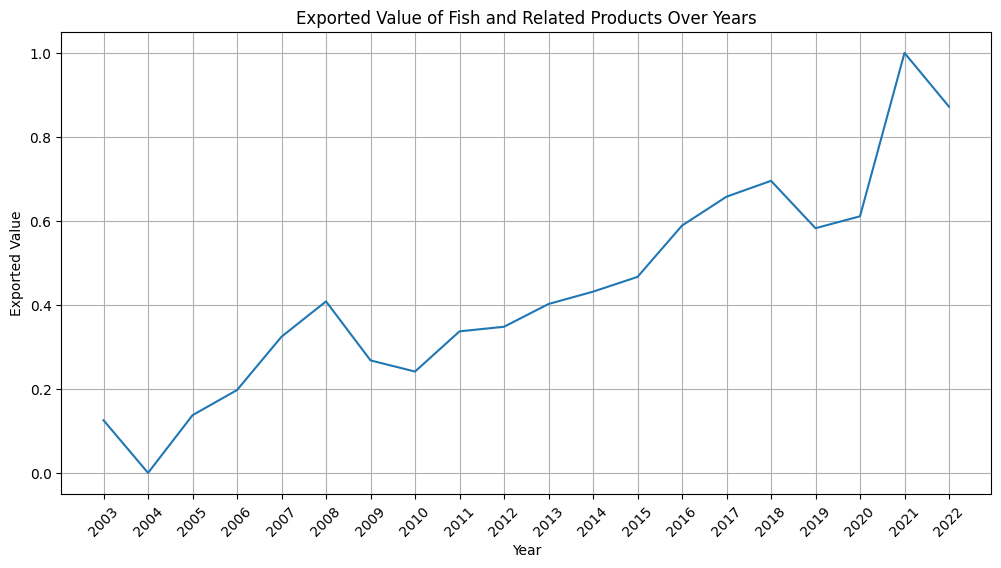

In [ ]:
# Tracer la 'Exported Value' avec toutes les années affichées

plt.figure(figsize=(12, 6))
plt.plot(df_final.index, df_final['Exported Value'])
plt.title('Exported Value of Fish and Related Products Over Years')
plt.xlabel('Year')
plt.ylabel('Exported Value')
plt.xticks(df_final.index, rotation=45)  # Set x-ticks to show all years
plt.grid(True)
plt.show()

In [ ]:
df_final.dtypes

Product label      object
Exported Value    float64
dtype: object

In [ ]:
# Enregistrer le DataFrame transformé dans un nouveau fichier CSV
df_final.to_csv('processed_moroccan_exports_fish.csv')